In [38]:
# Importing numpy and functions
import numpy as np
import helpers as h
from implementations import *
import matplotlib.pyplot as plt

In [20]:
# Setting a random seed
seed = 934586
np.random.seed(seed)

#### Setting some hyperparameters ########
K = 5
gamma = 0.01
max_iter = 500
featureThreshold = 0.5
acceptableMissingValues = 10

In [15]:
# Loading the data
X, xHeader, Y, yHeader, indexedX, indexedXheader, indexedY, indexedYheader = loadTrainingData()
print('')
# Cleaning/feature engineering the data
yClean, xClean, xHeaderClean, removedFeatures = dataCleaning(Y,X,xHeader,featureThreshold,acceptableMissingValues)
print('')
# Making a balanced data set to force the model to not just predict negatively all the time
yBalanced, xBalanced, balancePrior = balanceData(yClean,xClean)
print('')
# Adding dummy variables and replacing the remaining invalid values by the mean
tx = makeTrainingData(xBalanced)
print(f'The resultant dataarray tx has shape {tx.shape}')

Data successfully loaded, there are 321 features and 328135 samples, the shapes of the unindexed data is:
y: (328135, 1), x: (328135, 321)

For a threshold of 0.5, there are 174 good features, and 147 bad features
There remains in the data 131710 samples with at most 10 missing values
The number of invalid entries remaing in the dataset is 313170
That is 0.013665079236253106 parts of the whole dataset
Removed 11547 samples with outliers more than 10 standard deviations from the mean. There remains 120163 samples in the dataset.
Standardized data by subtracting the mean and dividing by the standard deviation

Created a balanced subset of the data, with 20908 samples, 10454 each of positive and negative samples

Added dummy variable and replaced invalid entries with zeros
The resultant dataarray tx has shape (20908, 175)


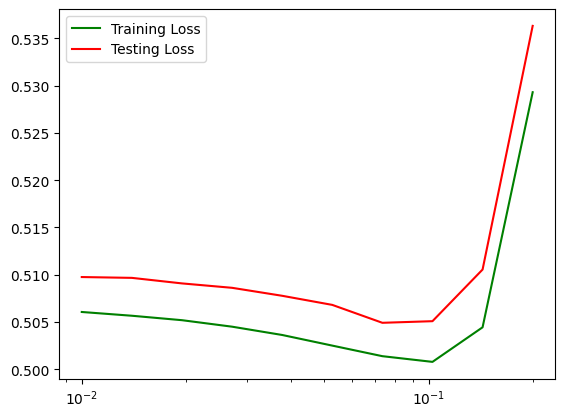

In [23]:
# Initializing the weights at zero
initial_w = np.zeros(tx.shape[1])

# Setting some lambdas to check for the best among them
lambdas = np.logspace(-2,-0.7,10)
# Looking for the best of the chosen lambdas
train_loss, test_loss, bestLambda, best_w = determineLambda(yBalanced,tx,initial_w,lambdas,max_iter,K,gamma)

# Plotting the training and testing errors as functions of lambda
plt.plot(lambdas,train_loss,label='Training Loss', color='g')
plt.plot(lambdas,test_loss,label='Testing Loss', color='r')
plt.xscale('log')
plt.legend()
plt.show()

In [39]:
predictions = makePredictions(best_w,X,xHeader,xHeaderClean)

print(f1_score(Y,predictions))

Added dummy variable and replaced invalid entries with zeros
0.3434309775529369


In [ ]:
# Training a model with logistic regression, with the chosen lambda
#reg_logistic_regression_fixed_lambda = lambda y, tx, initial_w, max_iters, gamma: reg_logistic_regression(y,tx,bestLambda,initial_w,max_iters,gamma)
#w_logistic, train_loss_logistic, test_loss_logistic = k_fold_cross_validation(yBalanced,tx,K,initial_w,max_iter,gamma,regressionFunction=reg_logistic_regression_fixed_lambda)

In [ ]:
############## Making predictions ###############
# Loading the test data
xTest, xIndexedHeader = loadData('./Data/x_test.csv')
print(xTest.shape)

# Making predictions
pred_logistic = makePredictions(best_w,xTest[:,1:],xHeader,xHeaderClean)
# Counting predicted positive cases
print(f'The model predicts {np.sum(pred_logistic)} positive cases')

# Converting the predictions from 0/1 to -1/1, and making a prediction file ready for submission
pred_logistic[pred_logistic == 0] = -1
h.create_csv_submission(xTest[:,0], pred_logistic, f'./Predictions/regularizedLogistic_seed_{seed}_gamma_{gamma}_iter_{max_iter}_K_{K}_featShold_{featureThreshold}_missVals_{acceptableMissingValues}.csv')
